# Lab 6:  Implement your own version of K-means

In class we have discussed how the K-means algorithm works, and you can read more about it in the text.  Your task this week is to implement your own version of K-means, and use it to cluster faces in the Olivetti dataset.  

You can work on this task either by yourself, or with one or two partners.  Please do *not* have a groupsize larger than 3, however.  Submission instructions are on Canvas.


# Part I:  Implement K-means

Your task is to implement a function called `get_clusters` that takes in a set of data and a number of clusters, and returns the centroids of those clusters, as well as the closest centroid for each data point.  Your code should make use of reasonable subfunctions, use good choices of variables, and be commented as necessary.

In [ ]:
import numpy as np


In [ ]:
# Sources used: https://dev.to/sajal2692/coding-k-means-clustering-using-python-and-numpy-fg1
#               https://www.geeksforgeeks.org/numpy-empty-python/
#               https://www.geeksforgeeks.org/euclidean-distance/

# This gets centroids by choosing a data instance from "datapoints" at random.
def get_centroids(datapoints: np.ndarray, k: int):
    # np.shape() refers to the number of elements in each dimension (represented as a tuple)
    # samples (aka m) = number of elements in first dimension of datapoints array
    # features (aka n) = number of elements in second dimension of datapoints array
    samples, features = np.shape(datapoints)

    # Make theCentroids array that will have the shape of (k, n)
    theCentroids = np.empty((k, features))

    # k represents the number of clusters (where each cluster has a centroid.)
    # Therefore, the number of centroids will be equal to the number of clusters.
    for i in range(k):
      # Get a data instance at random and make it a centroid.
      theCentroids[i] = datapoints[np.random.choice(range(samples))]
    return theCentroids


# This calculates the distance (Euclidean) between the centroid and a single datapoint.
# Formula for Euclidean distance: d = squareroot[[(x2 - x1)^2 + (y2 - y1)^2)]]
def get_euclidDistance(v1, v2):
    return np.sqrt(np.sum(np.power(v1 - v2, 2)))


# Identify centroid that is nearest to a single datapoint
def get_nearest_centroid(the_datapoint, some_k: int, centroidsArray):
    # Create array that will store the distance of a single datapoint from every centroid
    # np.empty(some_k) means Euclidean distances array will hold same number of elements as the number of clusters
    theEuclidDistances = np.empty(some_k)

    # Compare each Euclidean distance, and find the centroid with the shortest distance.
    for i in range(some_k):
        theEuclidDistances[i] = get_euclidDistance(centroidsArray[i], the_datapoint)
    return np.argmin(theEuclidDistances) # argmin() instead of min() because we need the INDEX of the nearest centroid


# After identifying the nearest centroid for a datapoint, assign that datapoint to the cluster with that centroid.
def generate_clusters(datapoints_all: np.ndarray, k_num: int, centroids_all):
    # Get number of samples based on set of datapoints (i.e. number of elements in first dimension of datapoints_all)
    # The underscore "_" means that we will ignore the number of elements in second dimension of datapoints_all array
    theSamples, _ = np.shape(datapoints_all)

    # Create array that will store the clusters that the datapoints are assigned to (i.e. by cluster's index value)
    cluster_Indices = np.empty(theSamples)

    for i in range(theSamples):
        cluster_Indices[i] = get_nearest_centroid(datapoints_all[i], k_num, centroids_all)
    return cluster_Indices


# Identify new centroids, then update the centroids.
def get_new_centroids(the_datapoints: np.ndarray, the_k: int, cluster_Indexes):
    # Get number of features based on set of datapoints (i.e. number of elements in second dimension of the_datapoints)
    _, theFeatures = np.shape(the_datapoints)

    # Create array that will store the new centroids that will have the shape of (k, n)
    newCentroids = np.empty((the_k, theFeatures))

    for i in range(the_k):
        # Identify datapoints that are part of a certain cluster
        cluster_datapoints = the_datapoints[cluster_Indexes == i]

        # Calculate the mean/average of the datapoints within a cluster.
        # The result will represent a new centroid.
        # Axis = 0 is used because we want to get the average across the datapoints (i.e. by column not by row.)
        # Source: https://www.geeksforgeeks.org/numpy-mean-in-python/
        newCentroids[i] = np.mean(cluster_datapoints, axis = 0)
    return newCentroids


def get_clusters(data: np.ndarray, n_clusters: int) -> tuple[np.ndarray, np.ndarray]:
    # Parameter data represents an array of instances from the data set. (i.e. X = [(m, n), ...])
    # Parameter n_clusters represents # of clusters we are working with (i.e. "k".)
    # get_clusters function will return a tuple of two different arrays.
    # The first array in the tuple represents the centroids found. (Each centroid is an array of 2 values [x, y].)
    # The second array in the tuple represents the list of closest centroids.
    # Total number of elements in second array will be equal to the total number of datapoints we have.

    # Get the centroids (to start with)
    centroids = get_centroids(data, n_clusters)

    # Get the clusters until all the data points in dataset have been used
    # 400 was used because that's the size of the Olivetti dataset (40 subjects x 10 images per subject)
    # Source: https://scikit-learn.org/0.19/datasets/olivetti_faces.html
    for i in range(400):
        closest_centroids = generate_clusters(data, n_clusters, centroids)

        # Keep track of initial centroid values
        original_centroids = centroids

        # Get updated centroids
        centroids = get_new_centroids(data, n_clusters, closest_centroids)
        # Compare if the new centroids differ from the original ones

        if np.allclose(original_centroids, centroids):
            break  # Exit the loop if centroids don't change
        '''
        centroidsVariation = original_centroids - centroids
        if centroidsVariation.any() == False:
           return closest_centroids'''

    # Return the centroids and the closest centroid for each datapoint
    return centroids, closest_centroids

# Part II:  Use your code to cluster the Olivetti dataset

Now use your clustering code to cluster the following pseudo-random data.  Examine the following questions:
* How well does your code do if you try to use 4 clusters?
* How well does it do if you use a different number of clusters?  Show how some perforamance metric changes over the number of clusters
* What happens if you modify the data to be either more or less overlapped?  (You can do this by adjusting the 'cluster_center' variable, or the covs)?

Note:  if you had any issues with the implementation in Part I, just use the default KMeans class from SKLearn for this part

In [ ]:
import pandas as pd
import seaborn as sns

### Generate psuedo random clusters

In [ ]:
# These are the "actual" centers in the x-y plane
cluster_centers = [
    (0, 0),
    (2, 0),
    (0, 1),
    (3, 2)
]
# The values change how "spread out" the data is.  Feel feel to play with them.
# The bigger the values, the more spread out the data points.  These values need to represent
# symmetric matrices
covs = [
    [[.25, 0], [0, .3]],
    [[.5, .1], [.1, .5]],
    [[.25, 0], [0, .25]],
    [[.5, 0], [0, .5]],
]
n_pts_per_cluster = 20

data = []
for ix, cluster in enumerate(cluster_centers):
    cov = covs[ix]
    samples = np.random.default_rng().multivariate_normal(mean=cluster, cov=cov, size=20)
    data += [(ix, s[0], s[1]) for s in samples]

data = pd.DataFrame(data, columns=['label', 'x', 'y'])


### Visualze the data

<Axes: xlabel='x', ylabel='y'>

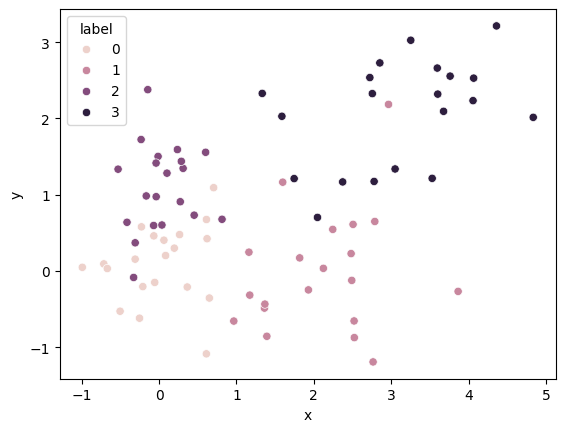

In [ ]:
sns.scatterplot(
    data=data,
    x='x',
    y='y',
    hue='label'
)

### Experiment with clustering here

Text(0.5, 1.0, '4 Clusters')

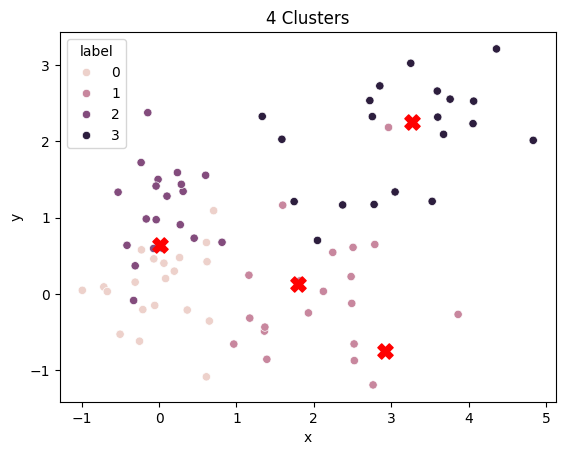

In [ ]:
import matplotlib.pyplot as plt

# Run your K-means implementation
centroids, closest_centroids = get_clusters(data[['x', 'y']].values, n_clusters=4)

# Plot the clusters
sns.scatterplot(
    data=data,
    x='x',
    y='y',
    hue='label'
)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=120)  # Plot centroids
plt.title('4 Clusters')

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


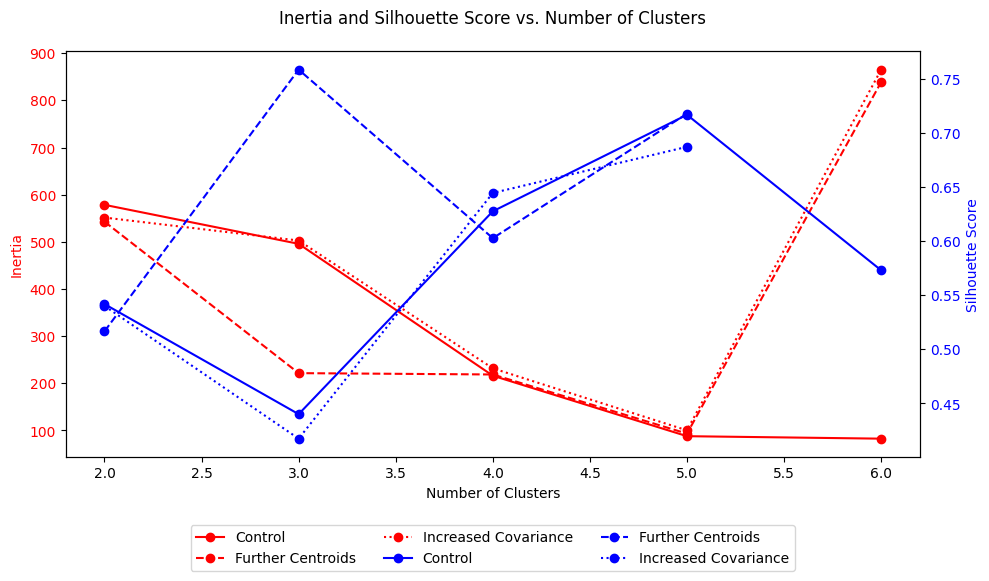

In [ ]:
from sklearn.metrics import silhouette_score

# Regenerate data to seperate tests
def regenerate_data(cluster_centers, covs):
  data = []
  for ix, cluster in enumerate(cluster_centers):
      cov = covs[ix]
      samples = np.random.default_rng().multivariate_normal(mean=cluster, cov=cov, size=20)
      data += [(ix, s[0], s[1]) for s in samples]
  return pd.DataFrame(data, columns=['label', 'x', 'y'])

def run():
  inertia_values = []
  silhouette_scores = []

  for k in cluster_range:
      centroids, closest_centroids = get_clusters(data[['x', 'y']].values, n_clusters=k)
      inertia = np.sum([get_euclidDistance(data[['x', 'y']].values[i], centroids[int(closest_centroids[i])]) for i in range(len(data))])
      inertia_values.append(inertia)

      # Check for the number of unique labels before calculating silhouette score
      if len(np.unique(closest_centroids)) > 1:  # Check if more than one unique label
          silhouette_scores.append(silhouette_score(data[['x', 'y']].values, closest_centroids))
      else:
          silhouette_scores.append(np.nan) # Append NaN if only one unique label
          print(f"Warning: Only one cluster found for k={k}. Silhouette score set to NaN.")

  return inertia_values, silhouette_scores

cluster_range = range(2, 7)

IV0, SS0 = run()

# Modify cluster centers to make them further away
cluster_centers = [
    (7, 0),
    (20, 0),
    (0, 5),
    (3, 20)
]
data = regenerate_data(cluster_centers, covs)
IV1, SS1 = run()

# Modify covariance matrices to make clusters more spread out
covs = [
    [[1, 0], [0, 1]],
    [[1, 0.5], [0.5, 1]],
    [[1, 0], [0, 1]],
    [[1, 0], [0, 1]]
]
data = regenerate_data(cluster_centers, covs)
IV2, SS2 = run()

# Plot results
fig, ax1 = plt.subplots(figsize=(10, 6))  # Increase figure size for better readability

# Plot inertia (on the left y-axis)
ax1.plot(cluster_range, IV0, marker='o', linestyle='-', color='red', label='Control')
ax1.plot(cluster_range, IV1, marker='o', linestyle='--', color='red', label='Further Centroids')
ax1.plot(cluster_range, IV2, marker='o', linestyle=':', color='red', label='Increased Covariance')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Inertia', color='red')  # Set y-axis label color to red
ax1.tick_params(axis='y', labelcolor='red')  # Set y-axis tick color to red

# Plot silhouette score (on the right y-axis)
ax2 = ax1.twinx()
ax2.plot(cluster_range, SS0, marker='o', linestyle='-', color='blue', label='Control')
ax2.plot(cluster_range, SS1, marker='o', linestyle='--', color='blue', label='Further Centroids')
ax2.plot(cluster_range, SS2, marker='o', linestyle=':', color='blue', label='Increased Covariance')
ax2.set_ylabel('Silhouette Score', color='blue')  # Set y-axis label color to blue
ax2.tick_params(axis='y', labelcolor='blue')  # Set y-axis tick color to blue

# Add a single legend for both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Add a title
plt.title('Inertia and Silhouette Score vs. Number of Clusters', pad=20)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()